## **Importing Dataset**

In [ ]:
!pip install tensorflow==2.15

In [ ]:
import tensorflow as tf

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
100% 534M/534M [00:24<00:00, 28.7MB/s]
100% 534M/534M [00:24<00:00, 23.2MB/s]


In [ ]:
!unzip '/content/vegetable-image-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [ ]:
import numpy as np
np.random.seed(1234)
import tensorflow as tf
tf.random.set_seed(1234)
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout ,GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

## **Read Dataset**

In [ ]:
# Read image folders (train, test, validation)
train_path = "/content/Vegetable Images/train"
test_path = "/content/Vegetable Images/test"
validation_path = "/content/Vegetable Images/validation"

In [ ]:
# Read image classes
image_classes = os.listdir("/content/Vegetable Images/test")
image_classes

['Radish',
 'Potato',
 'Papaya',
 'Tomato',
 'Brinjal',
 'Cabbage',
 'Broccoli',
 'Pumpkin',
 'Bitter_Gourd',
 'Capsicum',
 'Carrot',
 'Bean',
 'Bottle_Gourd',
 'Cauliflower',
 'Cucumber']

In [ ]:

# Class Names
root_path = train_path
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Class Distribution
class_dis = [len(os.listdir(root_path + '/' + name)) for name in class_names]


# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 15 
Class Names : ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


## **Data Visualization**

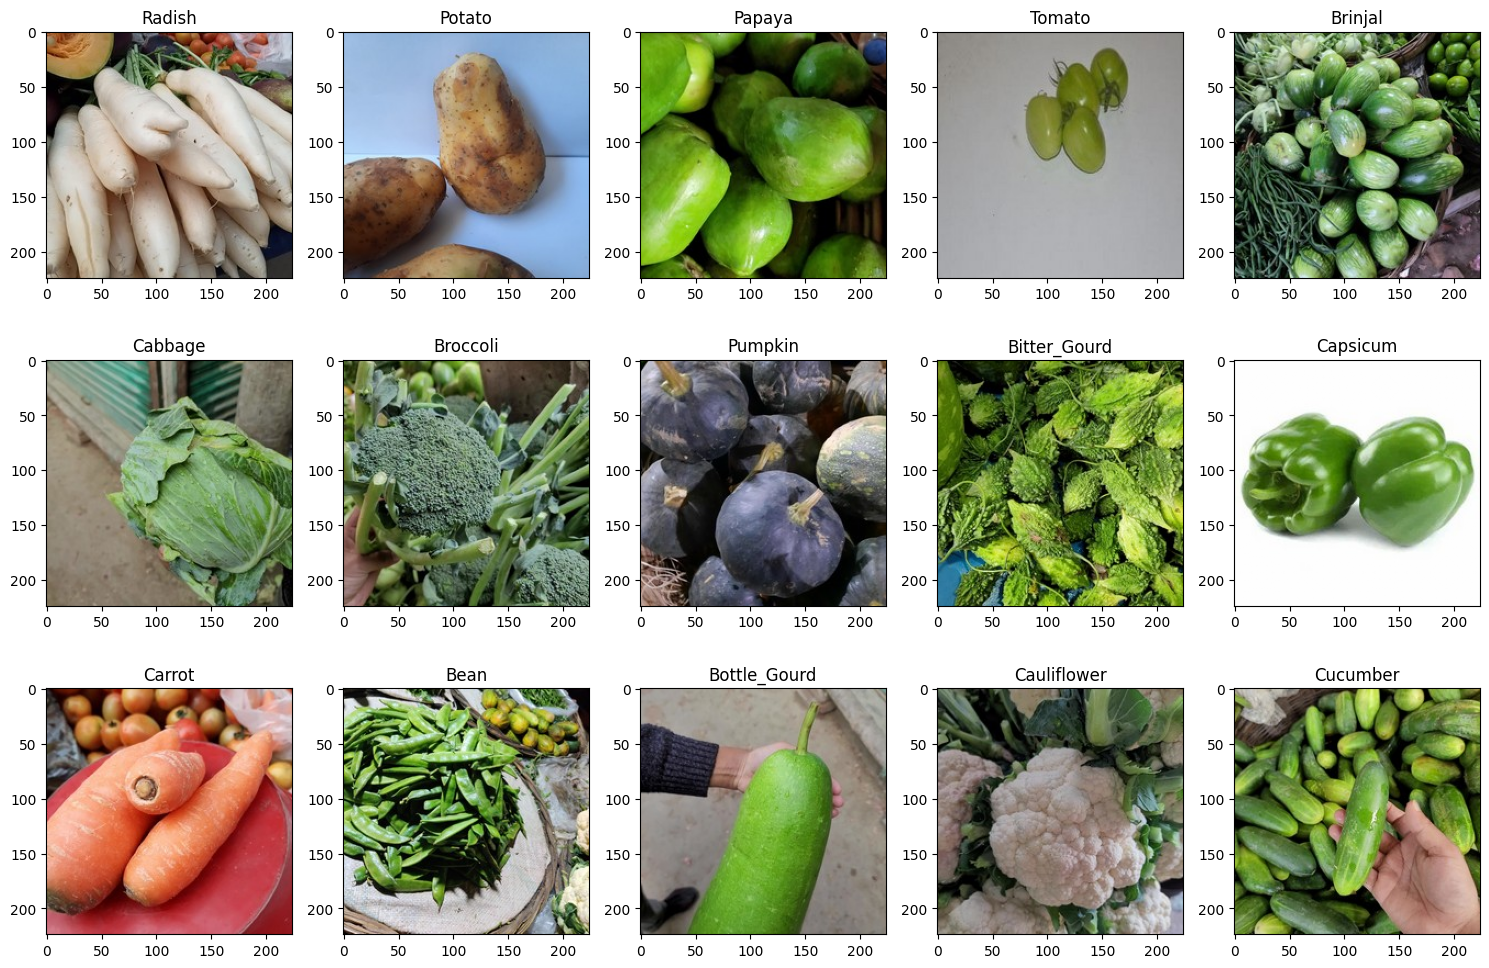

In [ ]:
def plot_images(image_classes):
    '''
     Plot Each label Once
    '''
    # Create a figure
    plt.figure(1,figsize=(15, 10))
    for i, cat in enumerate(image_classes):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[i]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255
        # Create Subplot and plot the images
        plt.subplot(3, 5, i+1)
        plt.title(cat)
        plt.imshow(img_arr)

    plt.tight_layout()

plot_images(image_classes)

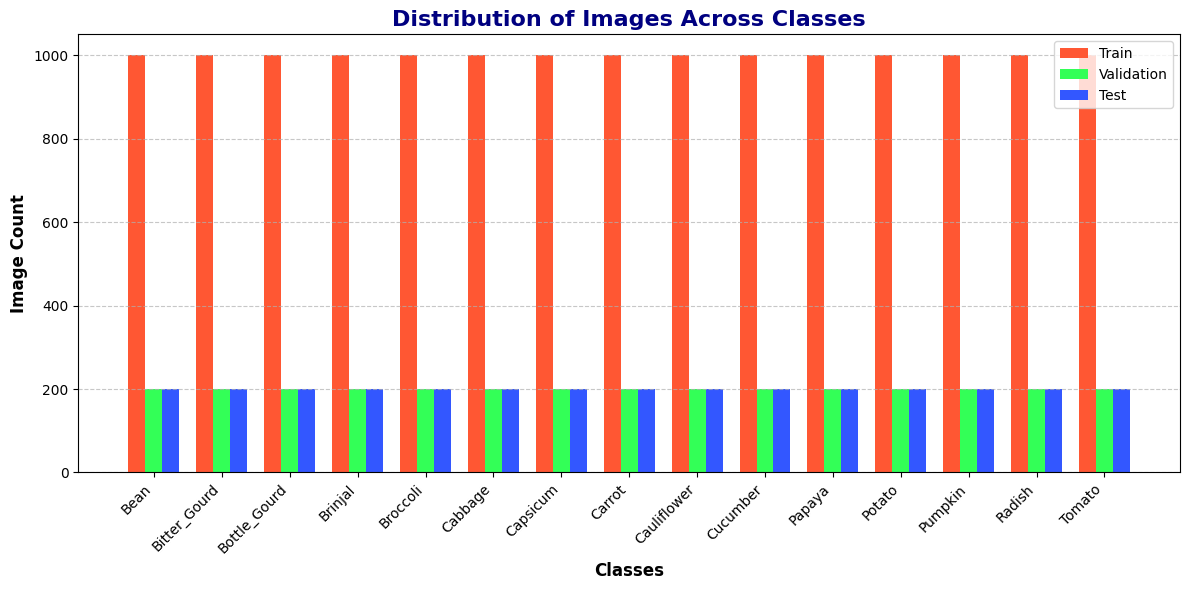

In [ ]:
from collections import defaultdict

# Function to count the number of images in each class directory
def count_images_in_directory(directory):
    class_counts = defaultdict(int)
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len([f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))])
    return class_counts
train_counts = count_images_in_directory(train_path)
validation_counts = count_images_in_directory(validation_path)
test_counts = count_images_in_directory(test_path)


labels = sorted(train_counts.keys())
train_values = [train_counts[cls] for cls in labels]
validation_values = [validation_counts[cls] for cls in labels]
test_values = [test_counts[cls] for cls in labels]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Adjusting colors for better readability and uniqueness
rects1 = ax.bar(x - width, train_values, width, label='Train', color='#FF5733')
rects2 = ax.bar(x, validation_values, width, label='Validation', color='#33FF57')
rects3 = ax.bar(x + width, test_values, width, label='Test', color='#3357FF')

# Customizing labels, title, and ticks
ax.set_xlabel('Classes', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Image Count', fontsize=12, fontweight='bold', color='black')
ax.set_title('Distribution of Images Across Classes', fontsize=16, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adding grid for better visualization
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()

plt.show()


## **Data Preprocessing**

In [ ]:
train_gen = ImageDataGenerator(
                  rescale = 1./255,# Normalise the data
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

In [ ]:
train_data = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',)

Found 15000 images belonging to 15 classes.


In [ ]:


test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data = test_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            shuffle = False
                                            )

Found 3000 images belonging to 15 classes.


In [ ]:
val_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_data = val_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical',
                                            )

Found 3000 images belonging to 15 classes.


In [ ]:
#Encoding labels
class_map = dict([(v, k) for k, v in train_data.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


## **CNN Model Building**

In [ ]:
tf.random.set_seed(1234)
model = Sequential()

In [ ]:
## Add layers to cnn model

# INPUT AND HIDDEN LAYERS

# Convolutional Layer
model.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",
                 input_shape = [224, 224, 3])
         )

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional Layer
model.add(Conv2D(filters = 64,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())

# CLASSIFICATION

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(15, activation = "softmax"))

## **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

## **Model Compiling & Fitting**

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True) # Set up callbacks

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

hist = model.fit(train_data,
                 epochs=10,
                 verbose=1,
                 validation_data=validation_data,
                 steps_per_epoch=15000//64,
                 validation_steps=3000//64,
                 callbacks=[early_stopping])


Epoch 1/10
234/234 [==============================] - 190s 806ms/step - loss: 0.2720 - accuracy: 0.9162 - val_loss: 0.2717 - val_accuracy: 0.9215
Epoch 2/10
234/234 [==============================] - 189s 808ms/step - loss: 0.1906 - accuracy: 0.9407 - val_loss: 0.2138 - val_accuracy: 0.9406
Epoch 3/10
234/234 [==============================] - 186s 795ms/step - loss: 0.1525 - accuracy: 0.9531 - val_loss: 0.2309 - val_accuracy: 0.9351


In [ ]:
model.save('cnn.h5') #saves the model as the name extension-.h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np


In [ ]:
index=['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

1/1 [==============================] - 0s 33ms/step


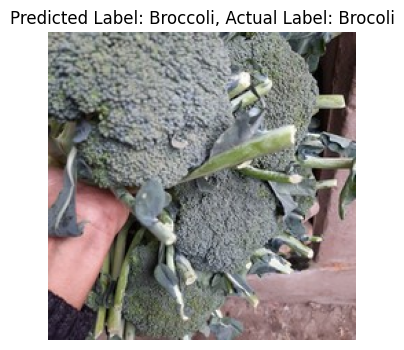

In [ ]:
#Testing the Model

test_image_path='/content/Vegetable Images/test/Broccoli/1001.jpg'
def generate_predictions (test_image_path, actual_label):
  test_img=image.load_img (test_image_path, target_size=(224, 224))
  test_img_arr= image.img_to_array(test_img)/255.0
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  #2. Make Predictions
  predicted_label = np.argmax(model.predict(test_img_input))
  predicted_vegetable = index[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()
  # call the function
generate_predictions (test_image_path, actual_label='Brocoli')

## **Transfer Learning**

In [ ]:
!pip install tensorflow==2.15

In [ ]:
import tensorflow as tf

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
tf.random.set_seed(1234)

In [ ]:
vgg = VGG16(include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
output = Dense(15,activation='softmax')(x)

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True) # Set up callbacks

hist1=vgg16.fit(train_data,validation_data=validation_data,epochs=5,callbacks=[early_stopping])



Epoch 1/5
235/235 [==============================] - 248s 1s/step - loss: 0.0158 - accuracy: 0.9967 - val_loss: 0.0269 - val_accuracy: 0.9917
Epoch 2/5
235/235 [==============================] - 210s 895ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0697 - val_accuracy: 0.9780


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np


In [ ]:
index=['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

1/1 [==============================] - 1s 1s/step


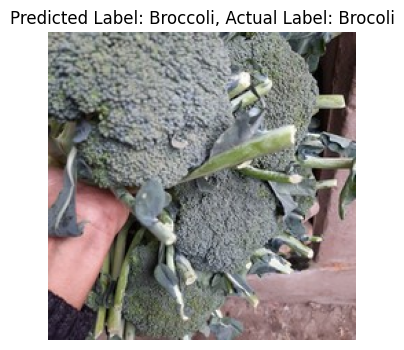

In [ ]:
#Testing the Model

test_image_path='/content/Vegetable Images/test/Broccoli/1001.jpg'
def generate_predictions (test_image_path, actual_label):
  test_img=image.load_img (test_image_path, target_size=(224, 224))
  test_img_arr= image.img_to_array(test_img)/255.0
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  #2. Make Predictions
  predicted_label = np.argmax(model1.predict(test_img_input))
  predicted_vegetable = index[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()
  # call the function
generate_predictions (test_image_path, actual_label='Brocoli')

## **Resnet**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
tf.random.set_seed(1234)

In [ ]:
resnet50 = ResNet50(include_top=False,input_shape=(224,224,3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in resnet50.layers:
  print(layer)

In [ ]:
for layer in resnet50.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(resnet50.output)
output = Dense(15,activation='softmax')(x)
resnet50 = Model(resnet50.input,output)

In [ ]:
resnet50.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
resnet50.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True) # Set up callbacks
hist2=resnet50.fit(train_data,validation_data=validation_data,epochs=5,callbacks=[early_stopping])

Epoch 1/5
235/235 [==============================] - 219s 891ms/step - loss: 3.4470 - accuracy: 0.2705 - val_loss: 2.2359 - val_accuracy: 0.3287
Epoch 2/5
235/235 [==============================] - 205s 871ms/step - loss: 1.9393 - accuracy: 0.4190 - val_loss: 1.3620 - val_accuracy: 0.5610
Epoch 3/5
235/235 [==============================] - 203s 865ms/step - loss: 1.7601 - accuracy: 0.4799 - val_loss: 1.1985 - val_accuracy: 0.6340
Epoch 4/5
235/235 [==============================] - 213s 905ms/step - loss: 1.5399 - accuracy: 0.5379 - val_loss: 1.3786 - val_accuracy: 0.5927


In [ ]:
!pip install keras-tuner

## **Hyperparameter Tuning**

In [ ]:
import keras_tuner as kt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a model-building function
def build_model(hp):
    inception = InceptionV3(include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers in the base model
    for layer in inception.layers:
        layer.trainable = False

    x = Flatten()(inception.output)

    # Tune the number of units in the Dense layer
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    x = Dense(units, activation='relu')(x)

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    output = Dense(15, activation='softmax')(x)

    model = Model(inception.input, output)

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model

# Set up the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial for robustness
    directory='kt_dir',
    project_name='inceptionv3_tuning'
)


# Search for the best hyperparameters
tuner.search(train_data, validation_data=validation_data, epochs=5)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of units in the dense layer is {best_hps.get('units')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 3 Complete [00h 17m 31s]
val_accuracy: 0.9933333396911621

Best val_accuracy So Far: 0.996666669845581
Total elapsed time: 00h 50m 33s

The hyperparameter search is complete.
The optimal number of units in the dense layer is 32.
The optimal learning rate for the optimizer is 0.0001.



## **Retraining the Model**

In [ ]:
best_model.fit(train_data, validation_data=validation_data, epochs=5)

Epoch 1/5
235/235 [==============================] - 212s 862ms/step - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.0144 - val_accuracy: 0.9970
Epoch 2/5
235/235 [==============================] - 190s 809ms/step - loss: 0.0130 - accuracy: 0.9971 - val_loss: 0.0160 - val_accuracy: 0.9960
Epoch 3/5
235/235 [==============================] - 195s 828ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0108 - val_accuracy: 0.9973
Epoch 4/5
235/235 [==============================] - 193s 822ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0229 - val_accuracy: 0.9913
Epoch 5/5
235/235 [==============================] - 195s 828ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0377 - val_accuracy: 0.9863


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

In [ ]:
index=['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage','Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

1/1 [==============================] - 3s 3s/step


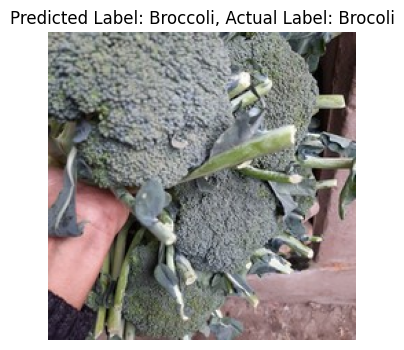

In [ ]:
#Testing the Model

test_image_path='/content/Vegetable Images/test/Broccoli/1001.jpg'
def generate_predictions (test_image_path, actual_label):
  test_img=image.load_img (test_image_path, target_size=(224, 224))
  test_img_arr= image.img_to_array(test_img)/255.0
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  #2. Make Predictions
  predicted_label = np.argmax(model2.predict(test_img_input))
  predicted_vegetable = index[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()
  # call the function
generate_predictions (test_image_path, actual_label='Brocoli')

## **Inception**

In [ ]:
train = train_gen.flow_from_directory(train_path,target_size=(299,299),batch_size=64)
val = val_gen.flow_from_directory(validation_path,target_size=(299,299),batch_size=64)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
tf.random.set_seed(1234)

In [ ]:
inceptionV3 = InceptionV3(include_top=False,input_shape=(299 ,299,3))
for layer in inceptionV3.layers:
  print(layer)

In [ ]:
for layer in inceptionV3.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(inceptionV3.output)

In [ ]:
output = Dense(15,activation='softmax')(x)

In [ ]:
inceptionV3 = Model(inceptionV3.input,output)

In [ ]:
inceptionV3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 149, 149, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 149, 149, 32)         0         ['batch_normalization_18

In [ ]:
inceptionV3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True) # Set up callbacks


hist3= inceptionV3.fit(train,validation_data=val,epochs=5,callbacks=[early_stopping])

Epoch 1/5
235/235 [==============================] - 385s 2s/step - loss: 1.2113 - accuracy: 0.9337 - val_loss: 0.0874 - val_accuracy: 0.9920
Epoch 2/5
235/235 [==============================] - 336s 1s/step - loss: 0.2294 - accuracy: 0.9828 - val_loss: 0.2090 - val_accuracy: 0.9837


In [ ]:
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

In [ ]:
index=['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

1/1 [==============================] - 4s 4s/step


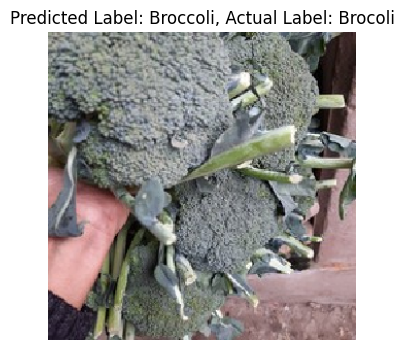

In [ ]:
#Testing the Model

test_image_path='/content/Vegetable Images/test/Broccoli/1001.jpg'
def generate_predictions (test_image_path, actual_label):
  test_img=image.load_img (test_image_path, target_size=(299, 299))
  test_img_arr= image.img_to_array(test_img)/255.0
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  #2. Make Predictions
  predicted_label = np.argmax(model3.predict(test_img_input))
  predicted_vegetable = index[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()
  # call the function
generate_predictions (test_image_path, actual_label='Brocoli')

## **Xception**

In [ ]:
train = train_gen.flow_from_directory(train_path,target_size=(299,299),batch_size=64)
val = val_gen.flow_from_directory(validation_path,target_size=(299,299),batch_size=64)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications.xception import Xception
tf.random.set_seed(1234)

In [ ]:
Xception1 = Xception(include_top=False,input_shape=(299,299,3))

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
for layer in Xception1.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(Xception1.output)

In [ ]:
output = Dense(15,activation='softmax')(x)

In [ ]:
Xception1 = Model(Xception1.input,output)

In [ ]:
Xception1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
Xception1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True) # Set up callbacks



hist4= Xception1.fit(train,validation_data=val,epochs=5,callbacks=[early_stopping])

Epoch 1/5
235/235 [==============================] - 403s 2s/step - loss: 0.5056 - accuracy: 0.9531 - val_loss: 0.1062 - val_accuracy: 0.9893
Epoch 2/5
235/235 [==============================] - 391s 2s/step - loss: 0.1700 - accuracy: 0.9866 - val_loss: 0.1137 - val_accuracy: 0.9910
Epoch 3/5
235/235 [==============================] - 372s 2s/step - loss: 0.1150 - accuracy: 0.9913 - val_loss: 0.1050 - val_accuracy: 0.9900


## **Saving Model**

In [ ]:
Xception1.save('Xception1.h5') #saves the model as the name extension-.h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Loading Model**

In [ ]:
from keras.models import load_model
model4=load_model('Xception1.h5')

In [ ]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

## **Testing Model**

In [ ]:
index=['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

1/1 [==============================] - 1s 1s/step


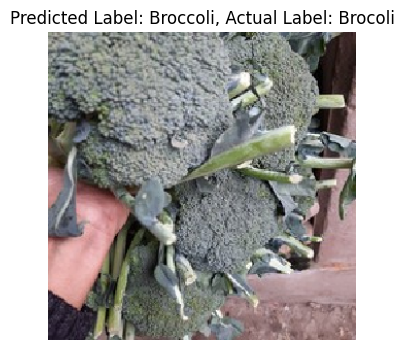

In [ ]:
#Testing the Model

test_image_path='/content/Vegetable Images/test/Broccoli/1001.jpg'
def generate_predictions (test_image_path, actual_label):
  test_img=image.load_img (test_image_path, target_size=(299, 299))
  test_img_arr= image.img_to_array(test_img)/255.0
  test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))
  #2. Make Predictions
  predicted_label = np.argmax(model4.predict(test_img_input))
  predicted_vegetable = index[predicted_label]
  plt.figure(figsize=(4, 4))
  plt.imshow(test_img_arr)
  plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
  plt.grid()
  plt.axis('off')
  plt.show()
  # call the function
generate_predictions (test_image_path, actual_label='Brocoli')

## **Model Visualization**

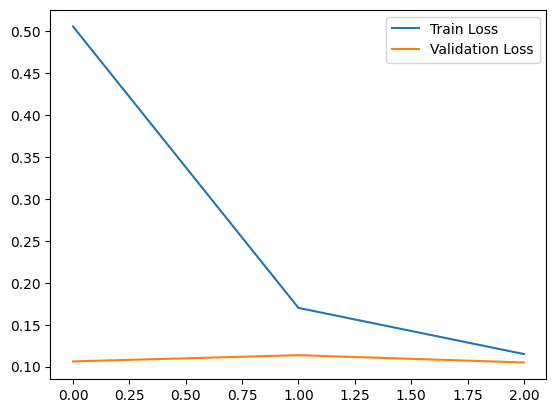

In [ ]:
plt.plot(hist4.history["loss"], label = "Train Loss")
plt.plot(hist4.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

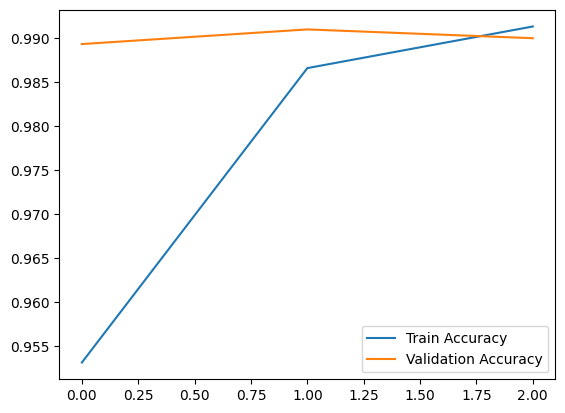

In [ ]:
plt.plot(hist4.history["accuracy"], label = "Train Accuracy")
plt.plot(hist4.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

## **Model Evaluation**

In [ ]:
test_data = test_gen.flow_from_directory(test_path,target_size=(299,299),batch_size=64)

Found 3000 images belonging to 15 classes.


In [ ]:
model4.evaluate(test_data)

47/47 [==============================] - 24s 507ms/step - loss: 0.1447 - accuracy: 0.9913


[0.14474427700042725, 0.9913333058357239]

In [ ]:
model4.evaluate(train)

235/235 [==============================] - 351s 1s/step - loss: 0.0960 - accuracy: 0.9920


[0.09602738916873932, 0.9919999837875366]

In [ ]:
y_pred = model4.predict(test_data)
predicted_classes = np.argmax(y_pred,axis=1)
print("\n------- Classification Report -------\n",classification_report(test_data.classes,predicted_classes))

47/47 [==============================] - 25s 535ms/step

------- Classification Report -------
               precision    recall  f1-score   support

           0       0.08      0.09      0.08       200
           1       0.06      0.06      0.06       200
           2       0.10      0.10      0.10       200
           3       0.06      0.06      0.06       200
           4       0.08      0.09      0.08       200
           5       0.04      0.04      0.04       200
           6       0.05      0.05      0.05       200
           7       0.07      0.07      0.07       200
           8       0.06      0.06      0.06       200
           9       0.07      0.07      0.07       200
          10       0.04      0.04      0.04       200
          11       0.08      0.07      0.08       200
          12       0.06      0.06      0.06       200
          13       0.04      0.04      0.04       200
          14       0.10      0.10      0.10       200

    accuracy                          